## Проект e-commerce

In [7]:
#импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

In [8]:
#загрузила необходимые данные
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
orders_item = pd.read_csv('olist_order_items_dataset.csv')

In [11]:
#Функция первичного обзора данных
def review(df):
    display(df.head(5))
    print(df.info())
    print('Пропуски:', df.isna().sum())
    print('Явные дубликаты:')
    if df.duplicated().sum() > 0:
        print(df.duplicated().sum())
    else:
        print('Не найдено')

# customers - таблица с уникальными идентификаторами пользователей

In [12]:
#Применяю функцию для таблицы с уникальными идентификаторами пользователей
review(customers)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Пропуски: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Явные дубликаты:
Не найдено


## Описание данных таблицы customers 
**olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**

- customer_id — позаказный идентификатор пользователя
- customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
- customer_zip_code_prefix —  почтовый индекс пользователя
- customer_city —  город доставки пользователя
- customer_state —  штат доставки пользователя

# orders - таблица заказов

In [13]:
#Применяю функцию для таблицы заказов
review(orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Пропуски: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_cus

## Описание таблицы orders

**olist_orders_dataset.csv —  таблица заказов**

- order_id —  уникальный идентификатор заказа (номер чека)
- customer_id —  позаказный идентификатор пользователя
- order_status —  статус заказа
- order_purchase_timestamp —  время создания заказа
- order_approved_at —  время подтверждения оплаты заказа
- order_delivered_carrier_date —  время передачи заказа в логистическую службу
- order_delivered_customer_date —  время доставки заказа
- order_estimated_delivery_date —  обещанная дата доставки


**Уникальные статусы заказов в таблице olist_orders_dataset:**
- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён

# orders_item - товарные позиции, входящие в заказы

In [7]:
#Применяю функцию для таблицы с  товарными позициями, входящие в заказы
review(orders_item)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Пропуски: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Явные дубликаты:
Не найдено


## Описание данных таблицы orders_item
**olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**

- order_id —  уникальный идентификатор заказа (номер чека)
- order_item_id —  идентификатор товара внутри одного заказа
- product_id —  ид товара (аналог штрихкода)
- seller_id — ид производителя товара
- shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
- price —  цена за единицу товара
- freight_value —  вес товара

## Пропуски 

В одном датасете, в таблице orders есть пропуски в трех столбцах:
- order_approved_at (время подтверждения оплаты заказа) -> 160
- order_delivered_carrier_date (время передачи заказа в логистическую службу) -> 1783
- order_delivered_customer_date (время доставки заказа) -> 2965

Наибольшее количество пропусков у заказов со статусами:
- created — создан
- approved — подтверждён
- invoiced — выставлен счёт
- processing — в процессе сборки заказа
- shipped — отгружен со склада
- unavailable — недоступен
- canceled — отменён

Это логично, так как заказ находится в процессе выполнения необходимых этапов. Но из них только статус доставлен(delivered) считается завершенным и у заказов с этим статусом также есть пропуски в order_approved_at (время подтверждения оплаты заказа) = 14 и order_delivered_carrier_date(время передачи заказа в логистическую службу) = 2. 

Итак, пропуски могли появиться по следующим причинам:
- Ошибка программы при вводе данных
- Ошибка сервера при выгрузке данных


# Подготовка данных

**В таблице orders есть колонки с датой, но они имеют тип данных объект, нужно конвертировать столбцы в дату.**
Нужно изменить следующие столбцы: 
- order_purchase_timestamp — время создания заказа
- order_approved_at — время подтверждения оплаты заказа
- order_delivered_carrier_date — время передачи заказа в логистическую службу
- order_delivered_customer_date — время доставки заказа
- order_estimated_delivery_date — обещанная дата доставки

In [8]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [9]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

**В таблице orders_item есть колонка с датой, также нужно конвертировать в дату**
- shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

In [10]:
orders_item['shipping_limit_date'] = pd.to_datetime(orders_item['shipping_limit_date'])

In [11]:
orders_item.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

## Что может считаться совершенной покупкой

In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [13]:
#Посмотрим на кол-во заказов в каждом статусе

orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [14]:
#заказы, где есть пропущенные значения в колонке подтверждение оплаты, 
#статус доставки доставленно
#есть время доставки

orders. \
query('order_status == "delivered"  & order_approved_at.isnull() & ~order_delivered_customer_date.isnull()').shape

#есть 14 заказов ДОСТАВЛЕННЫХ, НО БЕЗ ПОДТВЕРЖДЕНИЯ ОПЛАТЫ

(14, 8)

In [15]:
#найду кол-во заказов доставленых, с подтверждением оплаты и с отсутствие времени доставки 

orders. \
query('order_status == "delivered"  & ~order_approved_at.isnull() & order_delivered_customer_date.isnull()').shape

#Заказов в статусе доставлен, с подтверждением оплаты, но без времени доставки 8

(8, 8)

In [16]:
#заказы, где есть пропущенные значения в колонке "время передачи заказа в логистическую службу"
#статус доставки доставлено
#есть время доставки
orders. \
query('order_status == "delivered" & order_delivered_carrier_date.isnull() & ~order_delivered_customer_date.isnull()')

#Обнаружила один заказ со статусом доставлено, но в данных отсутствует 
#дата передачи в логистическую службу. 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14


In [17]:
#посмотрела что у каждого заказа может быть только один статус
orders.groupby('order_id')['order_status'].count()

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
00018f77f2f0320c557190d7a144bdd3    1
000229ec398224ef6ca0657da4fc703e    1
00024acbcdf0a6daa1e931b038114c75    1
00042b26cf59d7ce69dfabb4e55b4fd9    1
                                   ..
fffc94f6ce00a00581880bf54a75a037    1
fffcd46ef2263f404302a634eb57f7eb    1
fffce4705a9662cd70adb13d4a31832d    1
fffe18544ffabc95dfada21779c9644f    1
fffe41c64501cc87c801fd61db3f6244    1
Name: order_status, Length: 99441, dtype: int64

In [18]:
orders. \
query('order_status == "delivered"  & ~order_approved_at.isnull() & ~order_delivered_customer_date.isnull()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [19]:
#все заказы при условии что есть дата доставки 
orders.query('~order_delivered_customer_date.isnull()')['order_status'].value_counts()

#среди заказов с датой доставки есть отмененные заказы, либо это клиенты отказались от заказа при доставке, либо это ошибка в данных

delivered    96470
canceled         6
Name: order_status, dtype: int64

## Что считается совершенной покупкой

Совершенной покупкой будет считаться заказ, где: 

- **order_status == 'delivered';**
- **order_approved_at != 'NaT';**
- **order_delivered_customer_date != 'NaT'**


## Количество пользователей, которые совершили покупку только один раз

In [20]:
#сохранила в отдельных дф данные с доставленными, оплаченными заказами
purchases_df = orders. \
        query('order_status == "delivered"  & ~order_approved_at.isnull() & ~order_delivered_customer_date.isnull()')

In [21]:
purchases_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [22]:
#Объеденю таблицу customers с таблицей совершенных покупок, чтобы получитьть уникальный идентификатор пользователя
#customer_unique_id это уникальный идентификатор пользователя

user_purchases = customers.merge(purchases_df,on='customer_id')

user_purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
96451,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
96452,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
96453,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
96454,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [23]:
#Посчитаю кол-во покупок у каждого юзера 

user_purchases_count  = user_purchases.groupby('customer_unique_id').agg({'order_id':'count'}) \
        .rename(columns={'order_id':'count_purchases'}).sort_values('count_purchases',ascending=False).reset_index()

user_purchases_count.head()

,customer_unique_id,count_purchases
0,8d50f5eadf50201ccdcedfb9e2ac8455,15
1,3e43e6105506432c953e165fb2acf44c,9
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,ca77025e7201e3b30c44b472ff346268,7


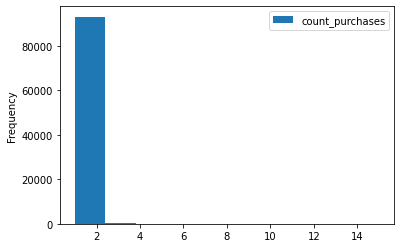

In [24]:
#Посчитаю сколько покупой совершили пользователи

user_purchases_count.plot.hist()

По графику видно, что большая часть клиентов совершила от 1 до 2 покупок. 

In [25]:
#Посчитаю кол-во пользователей, которые совершили 1 покупку
one_p = user_purchases_count.query('count_purchases == 1')

print(f'Кол-во пользователей, совершивших покупку только 1 раз: {len(one_p.customer_unique_id.unique())}')

Кол-во пользователей, совершивших покупку только 1 раз: 90537


In [26]:
more_than_one_p =  user_purchases_count.query('count_purchases > 1')

print(f'Кол-во пользователей, совершивших покупок больше 2 раз: {len(more_than_one_p.customer_unique_id.unique())}')

Кол-во пользователей, совершивших покупок больше 2 раз: 2800


**Клиентов, которые совершили покупку только один раз == 90 537**

## Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

### Выделю причины, по которым заказ не доставляется

In [27]:
#заказы, у которых нет даты доставки
orders_not_delivered_date = orders.query('order_delivered_customer_date.isnull()')

orders_not_delivered_date.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [28]:
#Заказы, которые в статусе "доставлено", но не имеют временной метки доставки 
orders_not_delivered_date.query('order_status == "delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24



*Среди заказов без даты доставки, есть **8 заказов в статусе "доставлен"**. Возможны два варианта: либо ошибка в данных, дата доставки не подгрузилась, либо заказ в неверном статусе и он не был доставлен (может быть его потеряли когда везли)*

Эти заказы я не буду брать в анализ 

**Я выделю три причины, по которым заказ не доставлен**

1. Заказ недоступен (unavailable)
2. Заказ отменен (canceled)

**За недоставленные заказы я возьму дф с заказами, где нет временной отметки, что был доставлен заказ**
- order_delivered_customer_date == 'NaT '

In [29]:
orders_not_delivered_date = orders_not_delivered_date.copy()

In [30]:
#Подготовлю дф для подсчета 

#Создам столбец с годом е месяцем
orders_not_delivered_date['order_purchase_month'] = orders_not_delivered_date['order_purchase_timestamp'].dt.strftime('%Y-%m')

#Оставлю только необходимые данные
df_not_delivered = orders_not_delivered_date \
        .query('order_status == "unavailable" or order_status == "canceled"')

df_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-08


In [31]:
df_count_not_del_orders = df_not_delivered.groupby(['order_purchase_month','order_status']).agg({'order_id':'count'}) \
        .sort_values(['order_purchase_month','order_status']).rename(columns={'order_id':'orders'}).reset_index()

df_count_not_del_orders.head()

,order_purchase_month,order_status,orders
0,2016-09,canceled,2
1,2016-10,canceled,19
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


In [32]:
pivot_df_count_not_del_orders = df_count_not_del_orders.pivot_table(
               index='order_purchase_month',
              columns='order_status',
              values='orders',
              aggfunc='sum')

pivot_df_count_not_del_orders.head()

order_status,canceled,unavailable
order_purchase_month,,
2016-09,2.0,NaN
2016-10,19.0,7.0
2017-01,3.0,10.0
2017-02,17.0,45.0
2017-03,33.0,32.0


## Вывод

**Детализация по причинам: сколько заказов в месяц не доставляются**

Text(0, 0.5, 'Количество недоставленных заказов')

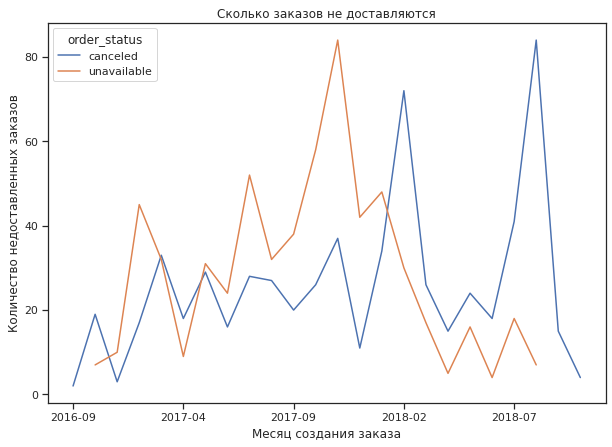

In [33]:
sns.set(
    style="ticks",
    rc={'figure.figsize':(10,7)}
        )
pivot_df_count_not_del_orders.plot()

plt.title("Сколько заказов не доставляются")
plt.xlabel("Месяц создания заказа")
plt.ylabel("Количество недоставленных заказов")


**Сколько в среднем не доставляется заказов**

In [34]:
print(f'Среднее кол-во недоствленных ОТМЕНЕННЫХ заказов: {pivot_df_count_not_del_orders.canceled.mean().round()}')
print()
print(f'Среднее кол-во недоставленных НЕДОСТУПНЫХ заказов: {pivot_df_count_not_del_orders.unavailable.mean().round()}')

Среднее кол-во недоствленных ОТМЕНЕННЫХ заказов: 26.0

Среднее кол-во недоставленных НЕДОСТУПНЫХ заказов: 29.0


## По каждому товару определить, в какой день недели товар чаще всего покупается

In [35]:
#Нужно подготовить дф. Объеденить таблицу с покупателями + заказами(совершенные покупки) + наименования товаров

#Объединила заказы(совершенные покупки) с покупателями
df = purchases_df.merge(customers,on='customer_id')

orders_customers_item = df.merge(orders_item,on='order_id')

In [36]:
#Беру таблицу где у меня объеденены покупатели, заказы, и товары и далее создаю колонку "day_of_week" там будет храниться день. 

orders_customers_item['day_of_week'] = orders_customers_item['order_purchase_timestamp'].dt.day_name()
orders_customers_item.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [37]:
#Группрую по дню и товару и считаю кол-во купленных товаров
products_days_of_week = orders_customers_item.groupby(['product_id','day_of_week']).agg({'order_item_id':'count'}) \
        .reset_index().sort_values('order_item_id',ascending=False).rename(columns={'order_item_id':'count_item'})

products_days_of_week.head()

,product_id,day_of_week,count_item
15592,422879e10f46682990de24d770e7f83d,Wednesday,93
35743,99a4788cb24856965c36a24e339b6058,Monday,91
40174,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40175,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
40170,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83


In [38]:
#Построим сводную таблицу для наглядности
products_days_of_week_pivot = products_days_of_week.pivot_table(
    index='product_id',
    columns='day_of_week',
    values='count_item',
    aggfunc='sum').fillna(0)

products_days_of_week_pivot.head()


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
#Найдем по каждому товару в какой день недели он чаще всего покупался

days_products = products_days_of_week_pivot.idxmax(axis=1).to_frame().rename(columns={0:'days_of_week'}).reset_index()

days_products.head()

,product_id,days_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


## Вывод

Для наглядности я визуализровала количество проданных товаров по каждому дню. На графике видно, что лидируют по продажам два дня: 
**Monday** и **Friday**

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Кол-во product_id')

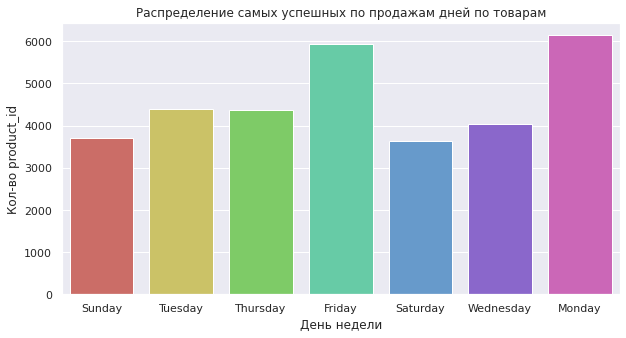

In [108]:
#Визуализируем для наглядности
plt.figure(figsize=(10,5))
sns.countplot(days_products['days_of_week'],palette='hls')

plt.title('Распределение самых успешных по продажам дней по товарам')
plt.xlabel('День недели')
plt.ylabel('Кол-во product_id')


## Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [41]:
#Нужна объединенная таблица
#Которая включает таблицу с customer + таблица с заказами, которые считаются совершенными(orders_cust) + таблица с позициями товара(orders_item)

orders_customers_item.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday


In [42]:
#Нужно создать колонку с месяцем в дальнейшем пригодится для подсчета
orders_customers_item['order_purchase_month'] = orders_customers_item['order_purchase_timestamp'].dt.strftime('%Y-%m')

#Сохраню в дф только необходимые колонки

product_customers = orders_customers_item[['customer_unique_id','order_item_id','product_id','order_purchase_timestamp','order_purchase_month']]

In [43]:
product_customers = product_customers.copy()

**Нужно посмотреть содержат наши данные полные месяца или нет**

In [44]:
print(f'Максимальная дата: {product_customers.order_purchase_timestamp.max()}')
print('---')
print(f'Минимальная дата: {product_customers.order_purchase_timestamp.min()}')


Максимальная дата: 2018-08-29 15:00:37
---
Минимальная дата: 2016-09-15 12:16:38


Получается, что в данных месяца начинаются не с 1 числа, содержат не полные месяца. Считать с неполного месяца неделю это будет неверно, наверное нужно взять только те месяца, которые полные. 

- Первая дата 2016-09-15 12:16:38 -- значит я возьму 2016-10-01 
- Последняя дата 2018-08-29 15:00:37 -- значит я возьму 2018-09-01

In [45]:
product_customers = product_customers \
        .query("order_purchase_timestamp >= '2016-10-01' and order_purchase_timestamp < '2018-09-01'")

product_customers.head()

,customer_unique_id,order_item_id,product_id,order_purchase_timestamp,order_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,2017-10
1,af07308b275d755c9edb36a90c618231,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,1,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,2018-08
3,7c142cf63193a1473d2e66489a9ae977,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,2018-02


In [46]:
#Создала колонку где будет хранится неделя, для группировки
product_customers['week'] = product_customers['order_purchase_timestamp'] - pd.to_timedelta(7, unit='d')

#product_customers.head()

In [47]:
#Сначала нужно посчитать кол-во покупок у пользователей по неделям

df_count_products_week = product_customers.groupby(['customer_unique_id','week']) \
        .agg({'order_item_id':'sum'}).rename(columns={'order_item_id':'count_products'}).reset_index()

df_count_products_week.head()

,customer_unique_id,week,count_products
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-03 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-04-30 11:11:27,1
2,0000f46a3911fa3c0805444483337064,2017-03-03 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-05 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-07 19:45:42,1


In [48]:
#Далее я объеденяю с product_customers чтобы получить колонку месяц

df_month_week_prod = df_count_products_week.merge(product_customers,on=['customer_unique_id','week']) \
        .drop_duplicates()

df_month_week_prod.head()

,customer_unique_id,week,count_products,order_item_id,product_id,order_purchase_timestamp,order_purchase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-03 10:56:27,1,1,372645c7439f9661fbbacfd129aa92ec,2018-05-10 10:56:27,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-04-30 11:11:27,1,1,5099f7000472b634fea8304448d20825,2018-05-07 11:11:27,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03-03 21:05:03,1,1,64b488de448a5324c4134ea39c28a34b,2017-03-10 21:05:03,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-05 20:29:41,1,1,2345a354a6f2033609bbf62bf5be9ef6,2017-10-12 20:29:41,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-07 19:45:42,1,1,c72e18b3fe2739b8d24ebf3102450f37,2017-11-14 19:45:42,2017-11


In [49]:
#Считаю среднее количество покупок по месяцам
final_mean_count_pr_month = df_month_week_prod.groupby(['customer_unique_id','order_purchase_month']).agg({'count_products':'mean'}) \
        .sort_values('order_purchase_month').rename(columns={'count_products':'mean_count_products'}).reset_index()

final_mean_count_pr_month

,customer_unique_id,order_purchase_month,mean_count_products
0,e8798977c2a62ecf8f2b17fba406097f,2016-10,1.0
1,f706755df4abce09ff6fcdfadbe76166,2016-10,1.0
2,8cd892a381c7d2f5532e23b83e509399,2016-10,1.0
3,40b41ade17bb2121b576b07e25ce622b,2016-10,1.0
4,0e1990d494dc3c1a2f5fca4b56c35a4c,2016-10,1.0
...,...,...,...
95166,8e189d068ef04b5a5100820fcf317000,2018-08,1.0
95167,645c9cb2c3f485b7757d9fe0ce376e78,2018-08,1.0
95168,8e12d069731871e72733b1b77c5931bd,2018-08,1.0
95169,645ddf9c2ff4189cd6588016b7b16e09,2018-08,1.0


Text(0, 0.5, 'Среднее кол-во заказов на пользователя в неделю')

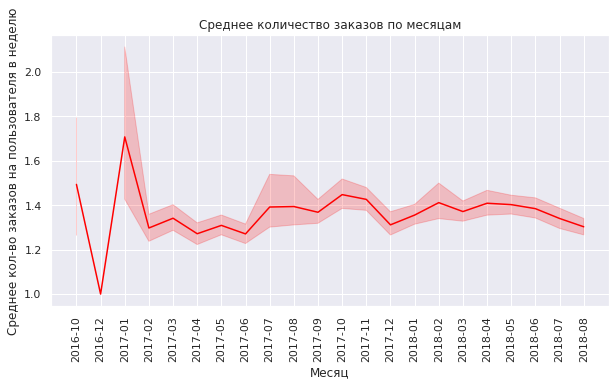

In [50]:
#Визуализирую
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid", palette="deep")
sns.lineplot(data=final_mean_count_pr_month,x='order_purchase_month',y='mean_count_products',color='red')

plt.xticks(rotation=90)
plt.title('Среднее количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее кол-во заказов на пользователя в неделю')

In [51]:
#Общее среднее количество покупок в неделю для всех пользователей
final_mean_count_pr_month['mean_count_products'].mean()

1.3711236407832537

## Вывод

Построила график распределения среднего количества заказов по месяцам. Из графика видно, что есть динамика изменения среднего количества заказов. 
В 2017-01 наблюдается  резкий скачок среднего кол-ва покупок. А 2016-12 среднее кол-во покупок в месяц уменьшилось до 1. 

Общее среднее количество покупок в неделю(по месяцам) составляет 1.37.

# Провести когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Перед проведением коготного анализа нужно определить 4 параметра:
1. Признак формирования когорты. Действие, которое объединяет людей в группу. В этом анализе признак - **первая покупка**
2. Размер когорты - временной интервал 
3. Отчетный период - время исследования проведения групп
4. Анализируемый ключевой показатель - **Retention**

In [52]:
# Определим время проведения исследования 

print(f'Максимальная дата: {orders.order_approved_at.max()}')
print('---')
print(f'Минимальная дата: {orders.order_approved_at.min()}')


Максимальная дата: 2018-09-03 17:40:06
---
Минимальная дата: 2016-09-15 12:16:38


У нас данные начинаются не с начала 2016 года и последняя дата это не конец 2018 года. Соответственно данные за 2016 и 2018 год неполные. 
Мне нужно посчитать retention в период с января  по декабрь, тогда, нужно взять один полный год, это у нас выходит 2017 год. 

Также нам нужно выявить когорту на 3й месяц, соответственно нам нужно брать 2017 год + 3 доп месяца из 2018(январь, февраль, март). Это нужно чтобы проанализировать когорту 2017-31-12

In [53]:
#Отчетный период - время исследования - 2017 год 
max_date = '2018-04-01'
min_date = '2017-01-01'

In [54]:
#Подготовим данные 

#Объединяю дф с пользователями с заказами 
df_customers_purchase = customers.merge(orders,on='customer_id')

#Объединяю df_customers_purchase с данными о товарах мб не надо пока этого делать 

In [55]:
#Оставляю только данные с совершенных покупками 
df_customers_purchase = df_customers_purchase \
        .query('order_status == "delivered"  & ~order_approved_at.isnull() & ~order_delivered_customer_date.isnull()')



In [56]:
df_customers_purchase.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [57]:
#Создам столбец с месяцем

df_customers_purchase['order_purchase_month'] = df_customers_purchase['order_purchase_timestamp'].dt.strftime('%Y-%m')

#Оставлю нужныый отчетный период
df_customers_purchase = df_customers_purchase.query('order_approved_at >= @min_date and order_approved_at <= @max_date')

In [58]:
#Найду дату первой покупку пользователя

first_purchase_month = df_customers_purchase.groupby('customer_unique_id').agg({'order_purchase_month':'min'}) \
        .rename(columns={'order_purchase_month':'first_purchase_month'}).reset_index()

first_purchase_month.head()

,customer_unique_id,first_purchase_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


Когортами будем считать людей, сделавших первую покупку в тот или иной день.

План такой: сначала добавим дату первой покупки пользователей в таблицу с заказами, затем сгруппируем по датам первой покупки и заказа и, наконец,количество заказов каждой когорты.

In [59]:
#Добавила дату первой покупки пользователей в таблицу с совершенными покупками

df_purchase_ch = first_purchase_month.merge(df_customers_purchase[['customer_unique_id','order_id','order_purchase_month']],on='customer_unique_id')

In [60]:
df_purchase_ch.head()

,customer_unique_id,first_purchase_month,order_id,order_purchase_month
0,0000f46a3911fa3c0805444483337064,2017-03,b33ec3b699337181488304f362a6b734,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10,41272756ecddd9a9ed0180413cc22fb6,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11,d957021f1127559cd947b62533f484f7,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02,44e608f2db00c74a1fe329de44416a4e,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03


In [61]:
#Сгруппировала по датам первой покупки и месяцу, когда был создан заказ и посчитала кол-во уникальных пользователей
df_purchase_chog = df_purchase_ch.groupby(['first_purchase_month','order_purchase_month']) \
        .agg({'customer_unique_id':'nunique'}).rename(columns={'customer_unique_id':'customers'})

df_purchase_chog.head()

customers
first_purchase_month order_purchase_month           
2017-01              2017-01                     716
                     2017-02                       2
                     2017-03                       2
                     2017-04                       1
                     2017-05                       3

In [62]:
#Построила pivot таблицу для наглядности

df_purchase_chog_pivot = df_purchase_chog.pivot_table(index='first_purchase_month',
                            columns='order_purchase_month',
                            values='customers')


df_purchase_chog_pivot

order_purchase_month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
first_purchase_month,,,,,,,,,,,,,,,
2017-01,716.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0
2017-02,NaN,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0
2017-03,NaN,NaN,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0
2017-04,NaN,NaN,NaN,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0
2017-05,NaN,NaN,NaN,NaN,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0
2017-06,NaN,NaN,NaN,NaN,NaN,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,3753.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,11.0
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4005.0,28.0,22.0,11.0,18.0,9.0,9.0


In [63]:
#Для подсчета ретеншн мне нужно сохранить значения когорт

purchase_size = df_purchase_chog['customers'].groupby('first_purchase_month').first()

purchase_size.head()

first_purchase_month
2017-01     716
2017-02    1616
2017-03    2503
2017-04    2257
2017-05    3450
Name: customers, dtype: int64

**Подсчет retention повторной покупки**

In [64]:
retention_purchase = df_purchase_chog_pivot.divide(purchase_size,axis=0)

retention_purchase

order_purchase_month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
first_purchase_month,,,,,,,,,,,,,,,
2017-01,1.0,0.002793,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.004190,0.001397,0.006983,0.004190,0.001397
2017-02,NaN,1.000000,0.001856,0.003094,0.001238,0.004332,0.001238,0.002475,0.001856,0.000619,0.001856,0.001238,0.003094,0.001238,0.001856
2017-03,NaN,NaN,1.000000,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998
2017-04,NaN,NaN,NaN,1.000000,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,0.001772,0.002658,0.000886
2017-05,NaN,NaN,NaN,NaN,1.000000,0.004638,0.004638,0.002899,0.002899,0.003188,0.004058,0.001449,0.002609,0.002609,0.002609
2017-06,NaN,NaN,NaN,NaN,NaN,1.000000,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005329,0.003464,0.002398,0.002931,0.002132,0.003197,0.001066,0.001865
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006902,0.003451,0.002711,0.003451,0.005176,0.002958,0.002711
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006991,0.005493,0.002747,0.004494,0.002247,0.002247


## Визуализирую retention 

Text(0.5, 229.5800000000001, 'Mесяц')

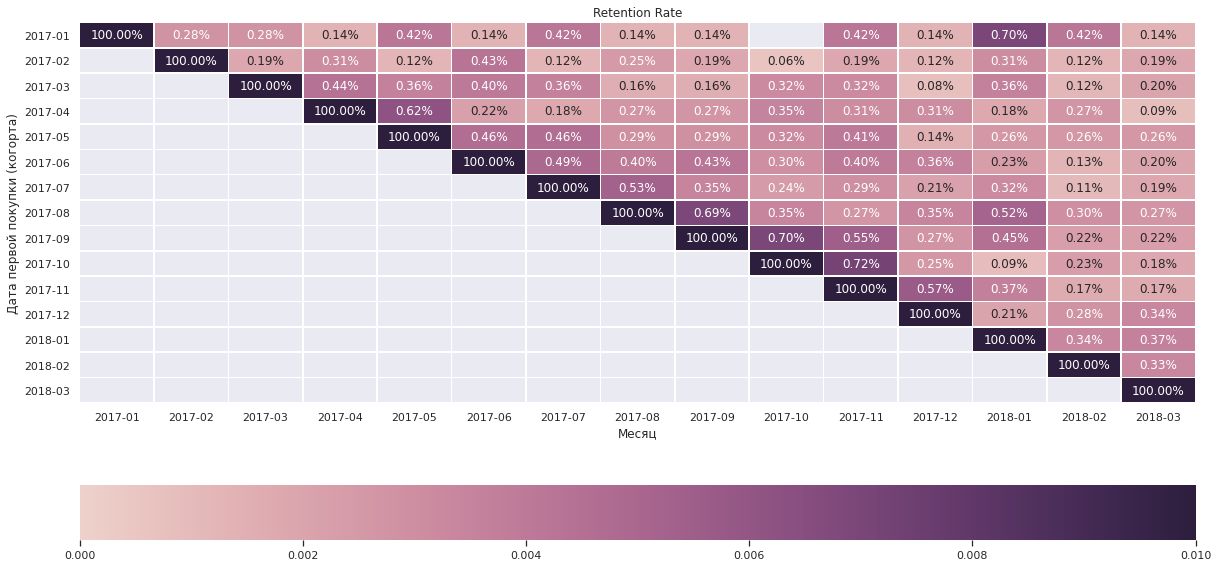

In [166]:
plt.figure(figsize=(20,10))
sns.heatmap(retention_purchase,annot=True,fmt='.2%',vmin=0.0, vmax=0.01,cmap=sns.cubehelix_palette(as_cmap=True),
           linewidth=.5,
           cbar_kws= {'orientation': 'horizontal'})

plt.title('Retention Rate')
plt.ylabel('Дата первой покупки (когорта)')
plt.xlabel('Mесяц')

**Вывод**

В период с января по декабрь когорта с самым высоким retention на 3й месяц - **"2017-06"**

*Retention составляет 0.004281 ~ 0,43 %*

## Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

**RFM сегментация**:

- R - время от последней покупки пользователя до текущей даты;
- F - суммарное количество покупок у пользователя за всё время;
- M - сумма покупок за всё время.

In [66]:
#Подготовлю данные 

#Оставлю, только те данные, которые я считаю покупкой 

only_purchase = orders. \
        query('order_status == "delivered"  & ~order_approved_at.isnull() & ~order_delivered_customer_date.isnull()')

# Нужно объеденить с таблицей покупателей 

purchase_user = only_purchase.merge(customers,on='customer_id')

#Далее нам понадобятся стоимость товаров для посчеты суммы покупок, для этого нужно объеденить с таблицей товаров 

purchases_user_df = purchase_user.merge(orders_item,on='order_id')

purchases_user_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [67]:
#Временные рамки данных 
print('Данные от {} до {}'.format(purchases_user_df['order_approved_at'].min(),
                                    purchases_user_df['order_approved_at'].max()))

Данные от 2016-09-15 12:16:38 до 2018-08-29 15:10:26


Для исследования нужны данные за один полный год. Это у нас 2017 год. Возьмем его для исследования

In [68]:
min_date = '2017-01-01'
max_date = '2017-12-31'

In [69]:
#Создам колонку месяц

purchases_user_df['order_purchase_month'] = purchases_user_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [70]:
#Оставлю данные только за нужные период 

#order_approved_at время подтверждения заказа == время покупки 

purchases_user_df = purchases_user_df.query('order_approved_at >= @min_date and order_approved_at <= @max_date')

purchases_user_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,2017-07
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,2017-05
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,2017-01


In [71]:
#Оставлю только нужные колонки

purchases_user_df = purchases_user_df[['order_id',
                   'customer_unique_id',
                   'order_purchase_timestamp',
                   'order_purchase_month',
                   'order_approved_at',
                   'order_item_id',
                   'product_id','price']]

In [72]:
#Я посчитала стоимость каждого заказа пользователя 

order_value_df = purchases_user_df.groupby(['order_id',
                   'customer_unique_id',
                   'order_approved_at']).agg({'price':'sum'}).reset_index()

order_value_df

,order_id,customer_unique_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90
2,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90
3,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,2017-05-17 03:55:27,21.90
4,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,2017-12-10 12:10:31,19.90
...,...,...,...,...
43289,fffa82886406ccf10c7b4e35c4ff2788,2a3ab9bf9639491997586882c502540a,2017-12-18 17:33:04,229.90
43290,fffb0b1a50e65c449020434fa835e078,b2d2b4204f7fc4b4aeca38e3cd680a7e,2017-04-12 16:45:12,4.90
43291,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,2017-10-28 02:55:58,220.00
43292,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,99.90


In [73]:
order_value_df

,order_id,customer_unique_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90
2,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90
3,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,2017-05-17 03:55:27,21.90
4,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,2017-12-10 12:10:31,19.90
...,...,...,...,...
43289,fffa82886406ccf10c7b4e35c4ff2788,2a3ab9bf9639491997586882c502540a,2017-12-18 17:33:04,229.90
43290,fffb0b1a50e65c449020434fa835e078,b2d2b4204f7fc4b4aeca38e3cd680a7e,2017-04-12 16:45:12,4.90
43291,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,2017-10-28 02:55:58,220.00
43292,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,99.90


In [74]:
#Наконец, я собираюсь смоделировать анализ, который провожу в реальном времени, установив дату NOWна один день после последней покупки. 
#Эта дата будет использоваться в качестве ориентира для расчета Recencyочков.

NOW = order_value_df['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2017-12-31 23:06:23')

# Рассчитайте новизну, частоту и денежную стоимость каждого клиента.

In [75]:
#Чтобы упростить задачу, я добавлю столбец с количеством дней между покупкой и текущим моментом. 
#Чтобы найти значения недавности, мне просто нужно найти минимум этого столбца для каждого клиента.

order_value_df['DaysSinceOrder'] = order_value_df['order_approved_at'].apply(lambda x: (NOW - x).days)


In [76]:
order_value_df

,order_id,customer_unique_id,order_approved_at,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90,109
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90,249
2,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90,330
3,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,2017-05-17 03:55:27,21.90,228
4,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,2017-12-10 12:10:31,19.90,21
...,...,...,...,...,...
43289,fffa82886406ccf10c7b4e35c4ff2788,2a3ab9bf9639491997586882c502540a,2017-12-18 17:33:04,229.90,13
43290,fffb0b1a50e65c449020434fa835e078,b2d2b4204f7fc4b4aeca38e3cd680a7e,2017-04-12 16:45:12,4.90,263
43291,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,2017-10-28 02:55:58,220.00,64
43292,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,99.90,68


In [77]:
order_rmf = order_value_df.groupby('customer_unique_id') \
        .agg({'DaysSinceOrder':'min','order_id':'count',
             'price':'sum'}) \
        .rename(columns={'DaysSinceOrder':'recency',
                        'order_id':'frequency',
                        'price':'monetary'}).reset_index()

In [79]:
order_rmf.head()

,customer_unique_id,recency,frequency,monetary
0,0000f46a3911fa3c0805444483337064,296,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90


Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Пример такого описания: 

### RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

- recency от 130 до 500 дней
- frequency от 2 до 5 заказов в неделю
- monetary от 1780 до 3560 рублей в неделю


In [80]:
order_rmf.describe()

,recency,frequency,monetary
count,42004.000000,42004.000000,42004.000000
mean,136.279878,1.030711,141.550970
std,95.155939,0.194341,223.668805
min,1.000000,1.000000,2.290000
25%,47.000000,1.000000,47.990000
50%,122.000000,1.000000,89.000000
75%,212.000000,1.000000,154.900000
max,360.000000,8.000000,13440.000000


Мне нужно рассчитать баллы для recency,frequency,monetary. Это можно сделать на основе ожидаемого поведения. 

**По recency у меня получились границы от 1 до 360 дней (кол-во дней с момента последней покупки)**

**По frequency границы от 1 до 8 покупок (кол-во покупок)** 

**По monetary границы общей суммы покупок от 2.29 до 13440 (общая сумма покупок)**


Мне нужно найти квантили для каждого из этих измерений 

### Recency - квантили

In [81]:
quintiles_r = order_rmf[['recency']].quantile([.25, .5, .75]).to_dict()
quintiles_r

{'recency': {0.25: 47.0, 0.5: 122.0, 0.75: 212.0}}

Получается: 

- меньше 47 
- больше или равно 47 и меньше 122
- больше или равно 122 и меньше 212
- больше или равно 212

*Если значение Recency меньше это значит лучше, значит должен быть ранг выше*

In [82]:
#Напишу функцию для вычисления ранга

def r_score(x):
    if x < quintiles_r['recency'][0.25]:
        return 4
    if quintiles_r['recency'][0.25] <= x < quintiles_r['recency'][0.5]:
        return 3
    if quintiles_r['recency'][0.5] <= x < quintiles_r['recency'][0.75]:
        return 2
    if x >= quintiles_r['recency'][0.75]:
        return 1

In [83]:
order_rmf['R'] = order_rmf['recency'].apply(lambda x: r_score(x))

order_rmf.head()

,customer_unique_id,recency,frequency,monetary,R
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,3
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,3
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2


### Frequency - квантили 

In [84]:
quantile_frequency_25 = order_rmf['frequency'].quantile(0.25)
quantile_frequency_50 = order_rmf['frequency'].quantile(0.5)
quantile_frequency_75 = order_rmf['frequency'].quantile(0.75)

print(quantile_frequency_25,quantile_frequency_50,quantile_frequency_75)

1.0 1.0 1.0


С частотой покупок у меня не получается поделить на квантили 25,75 и 50

In [85]:
#Уникальное значение кол-ва покупок
order_rmf['frequency'].unique()

array([1, 2, 3, 6, 5, 4, 8])

Получается можно разделить так:

- меньше 2 покупок 
- больше или равно 2 и меньше 4
- больше или 4 и меньше 6
- больше 6 

Более высокие значения частоты и денежного обращения лучше. Соответственно если значение в recency блоьше ранг должен был выше


In [86]:
def f_score(x):
    if x < 2:
        return 1
    if 2 <= x < 4 :
        return 2
    if 4 <= x < 6:
        return 3
    if x >= 6:
        return 4

In [87]:
order_rmf['F'] = order_rmf['frequency'].apply(lambda x: f_score(x))

order_rmf.head()

,customer_unique_id,recency,frequency,monetary,R,F
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,3,1
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,3,1
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00,1,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1


### Monetary - квантиль

Заметила сильный разброс в **'monetary'** границы общей суммы покупок от 2.29 до 13440 (общая сумма покупок)

In [88]:
order_rmf[['monetary']].describe()

,monetary
count,42004.000000
mean,141.550970
std,223.668805
min,2.290000
25%,47.990000
50%,89.000000
75%,154.900000
max,13440.000000


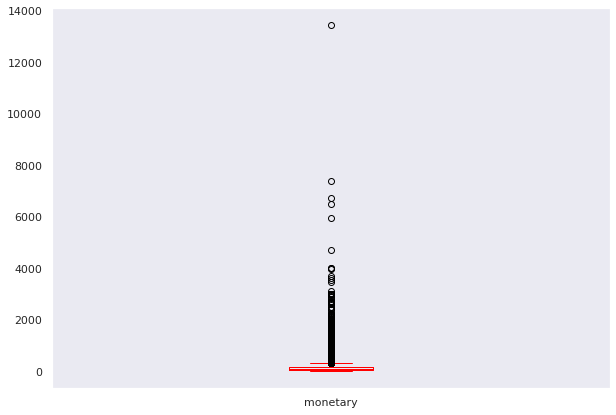

In [89]:
order_rmf.boxplot(column=['monetary'],grid= False , color='red')

In [90]:
order_rmf[['monetary']].query('monetary<4000').count()

monetary    41998
dtype: int64

In [91]:
order_rmf[['monetary']].query('monetary>4000').count()

monetary    6
dtype: int64

Большая часть значений лежит в диапозоне **monetary < 4000**

Значит мне нужно взять квантили от monetary с этим условием

In [92]:
#Все равно значения получаются небольшими

quintiles_m = order_rmf[['monetary']].query('monetary<4000').quantile([.25, .5,.75]).to_dict()
quintiles_m

{'monetary': {0.25: 47.99, 0.5: 89.0, 0.75: 154.9}}

In [93]:
order_rmf[['monetary']].query('monetary<4000').describe()

,monetary
count,41998.000000
mean,140.507175
std,203.182695
min,2.290000
25%,47.990000
50%,89.000000
75%,154.900000
max,3999.900000


Тогда я возьму от *значений лежит в диапозоне monetary < 4000* только 80% процентиль - это будет первый квантиль 

In [94]:
#Это первый квантиль
quantile_1 = float(order_rmf[['monetary']].query('monetary<4000').quantile(0.8))

In [95]:
#Это второль квантиль
quantile_2 = float(order_rmf[['monetary']].query('@quantile_1 <monetary<4000').quantile(0.8))

In [96]:
#Это третий квантиль
quantile_3 = float(order_rmf[['monetary']].query('@quantile_2 < monetary < 4000').quantile(0.8))

In [97]:
print(f'Квантили для измерения Monetary: {quantile_1,quantile_2,quantile_3}')

Квантили для измерения Monetary: (179.9, 499.0, 1199.0)


Получается можно разделить так:

- меньше 179.9 
- больше или равно 179.9 и меньше 499
- больше или 499 и меньше 1199.0
- больше 1199.0

Более высокие значения **Monetary** лучше. Соответственно если значение в monetary больше ранг должен был выше

In [98]:
#Напишу функция для для присвоения рангов

def m_score(x):
    if x < quantile_1:
        return 1
    if quantile_1 <= x < quantile_2 :
        return 2
    if quantile_2 <= x < quantile_3:
        return 3
    if x >= quantile_3:
        return 4

In [99]:
#Применю функцию к колонке monetary для получения оценки M
order_rmf['M'] = order_rmf['monetary'].apply(lambda x: m_score(x))

order_rmf.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,1
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,3,1,1
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,3,1,2
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00,1,1,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1


### Сегменты клиентов из оценки RFM

In [100]:
#Я объединяю оценки R, F и M в один балл RFM Score
order_rmf['RFM'] = order_rmf['R'].map(str) + order_rmf['F'].map(str) + order_rmf['M'].map(str)

order_rmf.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,1,111
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,3,1,1,311
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,3,1,2,312
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00,1,1,1,111
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1,211


*Оценки RFM дают нам (4**3) = 64 сегментов. Это большое кол-во.Следует выделить несколько сегментов для работы.*


Я собираюсь работать с оценками R и F. Выделю такие сегменты: 

1. **Новые пользователи, потратившие немного** - покупали недавно, но редко (или совершили один платеж), потратили так много.

2. **Многообещающие пользователи.** Это новые платящие пользователи, которые купили недавно, совершили один-два заказа, но потратили много. 

3. **Покупали недавно, покупают часто, тратят средне**. Это лояльные пользователи. 
4. **Покупали часто, но давно, тратили средне**. Это лояльные на грани ухода. 
5. **Покупали редко и давно, потратившие немного**. Это потерянные недоходные пользователи.
6. **Покупали редко и давно, потратившие много**. Это потерянные доходные пользователи

In [101]:
segt_map = {
    r'[3-4][1-2][1-2]': 'новые пользователи, потратили немного',
    r'[3-4][1-2][3-4]':'многообещающие пользователи',
    r'[3-4][3-4][2-4]':'лояльные пользователи',
    r'[1-2][3-4][2-4]':'лояльные, на грани ухода',
    r'[1-2][1-4][1-2]':'потерянные недоходные пользователи',
    r'[1-2][1-4][3-4]':'потерянные доходные клиенты'
}

In [102]:
order_rmf['Segment'] = order_rmf['R'].map(str) + order_rmf['F'].map(str)+order_rmf['M'].map(str)
order_rmf['Segment'] = order_rmf['Segment'].replace(segt_map, regex=True)
order_rmf.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM,Segment
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,1,111,потерянные недоходные пользователи
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,3,1,1,311,"новые пользователи, потратили немного"
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,3,1,2,312,"новые пользователи, потратили немного"
3,0005e1862207bf6ccc02e4228effd9a0,301,1,135.00,1,1,1,111,потерянные недоходные пользователи
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1,211,потерянные недоходные пользователи


### Визуализация сегментов 

Text(0, 0.5, 'Кол-во пользователей')

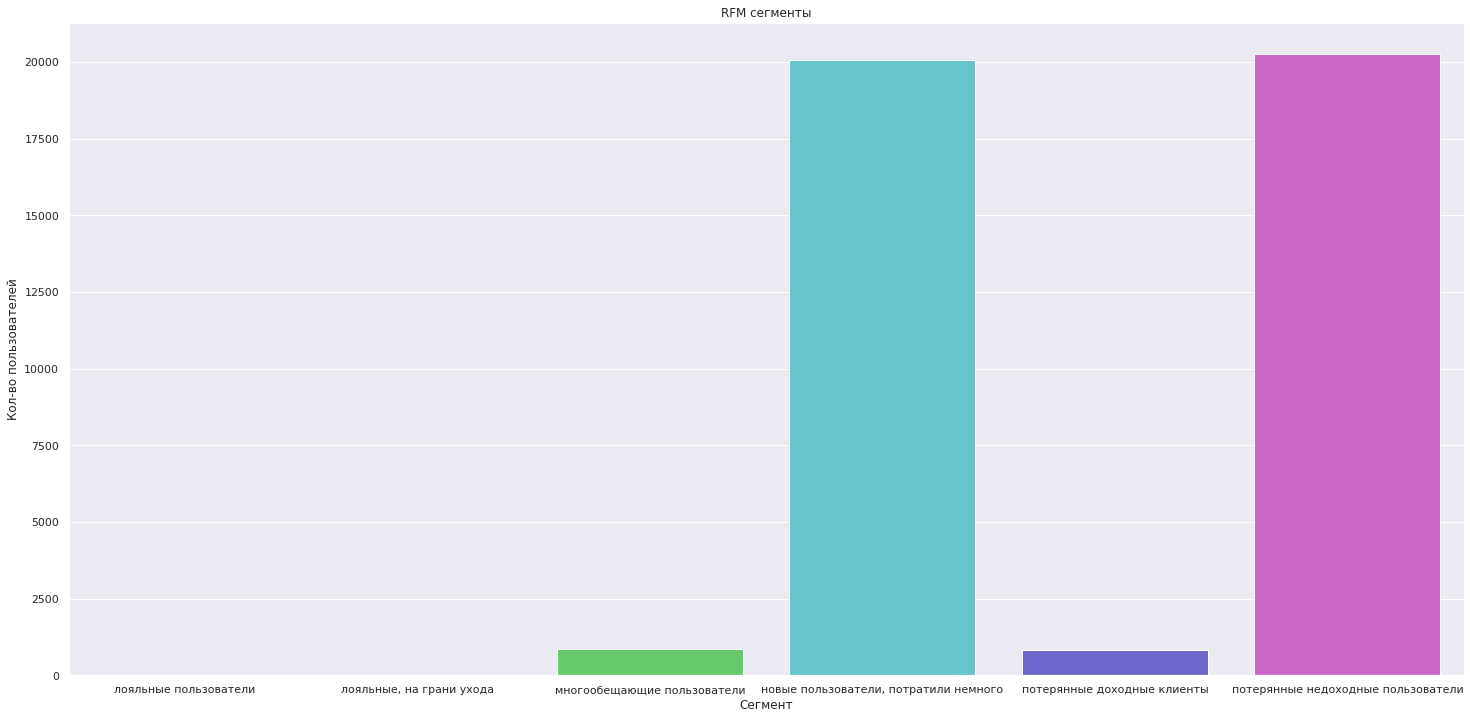

In [103]:
#Посчитаю кол-во клиентов в каждом сегменте
customer_segment = order_rmf.groupby('Segment').agg({'customer_unique_id':'nunique'}) \
        .rename(columns={'customer_unique_id':'customers'}).reset_index()

plt.figure(figsize=(25,12))
sns.barplot(data=customer_segment,x='Segment',y='customers',palette='hls')

plt.title("RFM сегменты")
plt.xlabel('Cегмент')
plt.ylabel("Кол-во пользователей")

In [104]:
customer_segment

,Segment,customers
0,лояльные пользователи,14
1,"лояльные, на грани ухода",2
2,многообещающие пользователи,861
3,"новые пользователи, потратили немного",20050
4,потерянные доходные клиенты,819
5,потерянные недоходные пользователи,20258


Исходя из данных таблицы и по графику, видно, что большая часть клиентов - **потерянные недоходные клиенты** и **новые пользователи, которые потратили от 180-500 на покупки**. Лояльных клиентов у сервиса можно сказать нет (14 лояльных из 42004)

In [105]:
#Посчитаю доходность каждого сегмента
monetary_customers = order_rmf.groupby('Segment').agg({'monetary':'sum'}) \
        .rename(columns={'monetary':'monetary_customers'}).reset_index()
monetary_customers

,Segment,monetary_customers
0,лояльные пользователи,7292.47
1,"лояльные, на грани ухода",761.07
2,многообещающие пользователи,782319.99
3,"новые пользователи, потратили немного",2207833.09
4,потерянные доходные клиенты,775626.80
5,потерянные недоходные пользователи,2171873.53


Text(0, 0.5, 'Доходность сегмента')

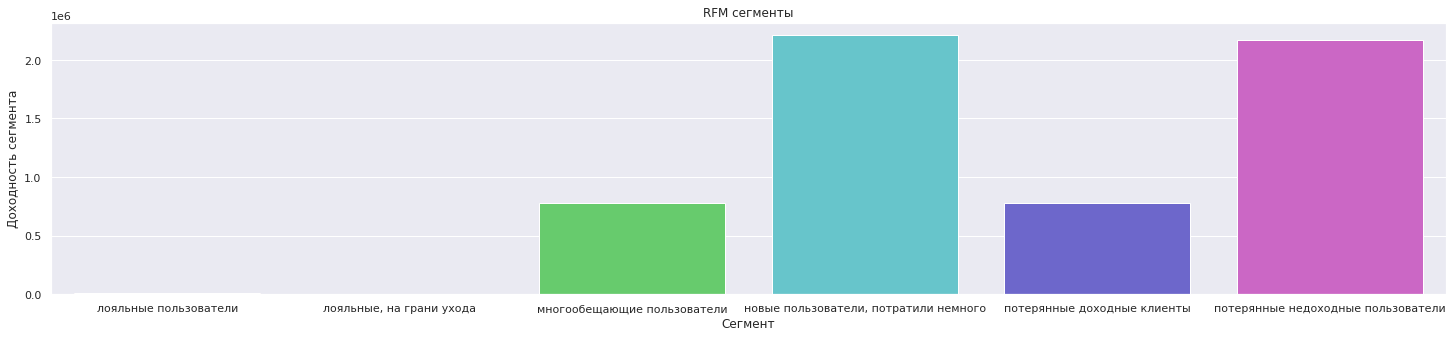

In [107]:
plt.figure(figsize=(25,5))
sns.barplot(data=monetary_customers,x='Segment',y='monetary_customers',palette='hls')
plt.title("RFM сегменты")
plt.xlabel('Cегмент')
plt.ylabel("Доходность сегмента")

In [122]:
#Кол-во пользователей
#customer_segment.customers.sum() - 42004


customer_segment['percentage_of_all_users'] = customer_segment['customers'].apply(lambda x: (x/42004)*100)
customer_segment

,Segment,customers,percentage_of_all_users
0,лояльные пользователи,14,0.033330
1,"лояльные, на грани ухода",2,0.004761
2,многообещающие пользователи,861,2.049805
3,"новые пользователи, потратили немного",20050,47.733549
4,потерянные доходные клиенты,819,1.949814
5,потерянные недоходные пользователи,20258,48.228740


## Выводы

Изучив данные покупок интернет-магазина(предположим). Я выявила основную проблему: **сервис не работает над удержанием и вовлечением клиентов.**

**Причины**: 

1. Пользователь остался недоволен работой сервиса/работой сотрудников(долгая доставка, потеряли заказ и тд)/качеством приобретенных товаров;
2. Высокая конкуренция, сервис не может предложить или не думает предлагать выгодные предложения;
3. У сервиса отсутсвуют программы лояльности, они не работают над повторными продажами. Не управляют оттоком клиентов. 

**Рекомендации**: 

1. Нужно внедрить прозвон ушедших клиентов, клиентов, которые покупают редко, с целью: узнать причину их ухода. Может быть они недовольны доставкой, грубое отношение сотрудников, недовольный работой сервиса, может быть сервис подвисает, картинки не грузятся. 
2. Знакомить клиентов с товарной линейкой. Напоминать о себе (звонки, уведомления, акции).
3. Разработать программу лояльности, давать персональные предложения. Мотивировать покупателей совершать повторные покупки.
*Это может быть клубная карта, персональные скидки, накопительные бонусы и другие приятные возможности, которыми могут воспользоваться постоянные клиенты*
4. Проанализировать конкурентов. 
5. Сделать сайт/приложение максимально удобным для пользователя. 
